In [1]:
import pandas as pd
import numpy as np
import os
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anuraagreddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# read data from the csv file (from the location it is stored)
Data = pd.read_csv("/Users/anuraagreddy/Desktop/MS(UIC)/Spring '25/CS 521 (SNLP)/Stat NLP Project/CS521_TextSummarization_Project/wikihowAll_Dataset.csv")
Data = Data.astype(str)
rows, columns = Data.shape

In [4]:
Data

,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor‚Äôs degree.,\nEnroll in a stu...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."
...,...,...,...
1494,"\nScout your yard.,\nCreate a grip.,\nWrap the...",How to Build a Squirrel House2,Plan to spend a day watching your yard to wit...
1495,"\nAsk for pedigree papers.,\nGet a DNA test.,\...",How to Identify Birman Cats2,Cats like the Birman that are more exclusive ...
1496,"\nDo a search on the Internet for ""Birman"" cat...",How to Identify Birman Cats3,This can help you find any breeders in your a...
1497,"\nTake good care of your Bengal cat.,\nPlay wi...",How to Keep a Bengal Cat Happy,"Make sure everything is done correctly, so yo..."


In [5]:
# Filtering rows where 'text' and 'headline' columns are not null
df = Data[(Data['text'].notna()) & (Data['headline'].notna())]

# Removing rows where the 'text' column has 'nan' as its value
df = df[df['text'] != 'nan']

# Dropping duplicate entries based on the 'text' column
df = df.drop_duplicates(subset='text', inplace=False)


In [6]:
# Set of stopwords
english_stopwords = set(stopwords.words('english'))

def clean_text_input(input_text, mode):
    modified_text = input_text.lower()
    modified_text = BeautifulSoup(modified_text, "lxml").get_text()
    modified_text = re.sub(r'\([^)]*\)', '', modified_text)
    modified_text = modified_text.replace('"', '')
    modified_text = ' '.join([contraction_mapping.get(word, word) for word in modified_text.split()])
    modified_text = re.sub(r"'s\b", "", modified_text)
    modified_text = re.sub("[^a-zA-Z]", " ", modified_text)
    modified_text = re.sub('[m]{2,}', 'mm', modified_text)

    if mode == 0:
        modified_text = re.sub(r'\.', ' . ', modified_text)
        words_list = [word for word in modified_text.split() if word not in english_stopwords]
    else:
        words_list = modified_text.split()

    # Filter out single-character words
    longer_words = [word for word in words_list if len(word) > 1]
    return " ".join(longer_words).strip()


In [7]:
# Flat contraction mapping
contraction_mapping = {
    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
    "I'm": "I am", "I've": "I have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
    "you'll've": "you will have", "you're": "you are", "you've": "you have",
    "he'd": "he would", "he'll": "he will", "he's": "he is",
    "she'd": "she would", "she'd've": "she would have", "she'll": "she will",
    "she'll've": "she will have", "she's": "she is",
    "it'd": "it would", "it'd've": "it would have", "it'll": "it will",
    "it'll've": "it will have", "it's": "it is",
    "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
    "we'll've": "we will have", "we're": "we are", "we've": "we have",
    "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
    "they'll've": "they will have", "they're": "they are", "they've": "they have",
    "aren't": "are not", "can't": "cannot", "couldn't": "could not", "didn't": "did not",
    "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not",
    "haven't": "have not", "isn't": "is not", "mustn't": "must not", "shan't": "shall not",
    "shouldn't": "should not", "wasn't": "was not", "weren't": "were not", "won't": "will not",
    "wouldn't": "would not", "'cause": "because", "o'clock": "of the clock", "ma'am": "madam", "let's": "let us"
}


In [8]:
cleaned_texts_list = []
for t in df['text']:
    cleaned_texts_list.append(clean_text_input(t, 0))

In [9]:
#call the function
clean_summary = []
for t in df['headline']:
    clean_summary.append(clean_text_input(t,0))

In [10]:
df['text']=cleaned_texts_list
df['headline']=clean_summary

df.replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

Updating the df

**Analyzing the sequence distribution**

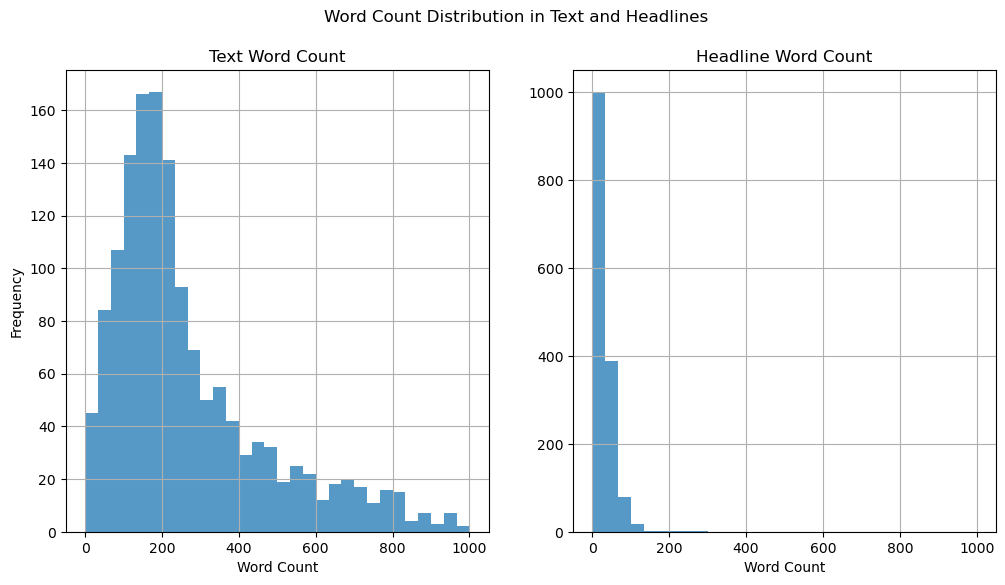

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' and list calculations are correct
text_word_count = [len(i.split()) for i in df['text']]
headline_word_count = [len(j.split()) for j in df['headline']]
length_df = pd.DataFrame({'text': text_word_count, 'headline': headline_word_count})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
length_df['text'].hist(bins=30, range=[0, 1000], alpha=0.75, ax=axes[0])
length_df['headline'].hist(bins=30, range=[0, 1000], alpha=0.75, ax=axes[1])

axes[0].set_title('Text Word Count')
axes[1].set_title('Headline Word Count')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')
axes[1].set_xlabel('Word Count')

plt.suptitle('Word Count Distribution in Text and Headlines')
plt.show()


In [12]:
# From the graph
# We can fix maximum length of text = 150 since most of the reviews have a length of 150 and maximum headline length of 50, since maximum headlines are of size 40

max_len_text= 150
max_len_headline=50

In [13]:
cnt=0
for i in df['text']:
    if(len(i.split())<=1500):
        cnt=cnt+1
print(cnt/len(df['text']))

0.9979892761394102


Selecting text and headlines below the maximum lengths

In [14]:
text1 =np.array(df['text'])
headline1=np.array(df['headline'])

short_text=[]
short_summary=[]

for i in range(len(text1)):
    if(len(headline1[i].split())<=50 and len(text1[i].split())<=150):
        short_text.append(text1[i])
        short_summary.append(headline1[i])

df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [15]:
# Validating the lengths

text1 =np.array(df['text'])
headline1=np.array(df['summary'])


for i in range(len(text1)):
    if(len(headline1[i].split())>=150):
      print(i)


In [16]:
print(df['text'][50],df['summary'][50],sep='\n')

guy like every facebook status update instagram picture post better yet frequently comment posts sign wants interact may indicate likes look see comments people posts well comments frequently may reveal avid social media user however rarely likes comments posts sign might feelings publicly comments one photos posts respond eager start conversation way may reveal likes least enjoys messaging example may say great photo could respond saying vancouver last week beautiful city guy met starts liking commenting old photos sig interested means spent time looking back old photos probably wants know better enjoys looking pictures guy likes want connect follow variety different social media platforms example may add facebook snapchat start following twitter instagram adding number social media sites likely sign wants look posts photos selfies attempt get know better
see interacts posts reply comments notice comments old pictures posts check see added multiple social media platforms


**Splitting data into train, test  --  70 - 30**

In [46]:
from sklearn.model_selection import train_test_split
x_texts = df['text'].astype(str).tolist()
y_texts = ['starttoken ' + str(summary) + ' endtoken' for summary in df['summary'].astype(str).tolist()]

# Split raw text and summaries
x_tr_texts, x_val_texts, y_tr_texts, y_val_texts = train_test_split(
    df['text'].astype(str), df['summary'].astype(str),
    test_size=0.3, random_state=0, shuffle=True
)

# Add start and end tokens to summaries
y_tr_texts = ['starttoken ' + text + ' endtoken' for text in y_tr_texts]
y_val_texts = ['starttoken ' + text + ' endtoken' for text in y_val_texts]



In [18]:
print(df.columns)


Index(['text', 'summary'], dtype='object')


In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# 1. Tokenizer for input text (x)
x_tokenizer = Tokenizer(oov_token='<OOV>')
x_tokenizer.fit_on_texts(x_tr_texts)

# 2. Tokenizer for summaries (y)
y_tokenizer = Tokenizer(oov_token='<OOV>')
y_tokenizer.fit_on_texts(y_tr_texts)

# 3. Convert texts to sequences
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr_texts)
x_val_seq = x_tokenizer.texts_to_sequences(x_val_texts)

y_tr_seq = y_tokenizer.texts_to_sequences(y_tr_texts)
y_val_seq = y_tokenizer.texts_to_sequences(y_val_texts)

# 4. Define max lengths
max_len_text = 48
max_len_summary = 49

# 5. Pad sequences
x_tr = pad_sequences(x_tr_seq, maxlen=max_len_text, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_len_text, padding='post')

y_tr = pad_sequences(y_tr_seq, maxlen=max_len_summary, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_len_summary, padding='post')

# 6. Vocabulary sizes
x_voc_size = len(x_tokenizer.word_index) + 1
y_voc_size = len(y_tokenizer.word_index) + 1

# 7. For inference decoding
target_word_index = y_tokenizer.word_index
reverse_target_word_index = y_tokenizer.index_word


In [20]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 72.34996102883866
Total Coverage of rare words: 18.91712398196372


In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'original_x_tr' and 'original_x_val' hold the original training and validation texts
original_x_tr = df['text'].values  # Original texts as a NumPy array or list
original_x_val = df['text'].values  # Same for validation

# Initialize the tokenizer
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
x_tokenizer.fit_on_texts(list(original_x_tr))  # Use the original texts for fitting

# Convert text sequences into integer sequences
x_tr_seq = x_tokenizer.texts_to_sequences(original_x_tr)
x_val_seq = x_tokenizer.texts_to_sequences(original_x_val)

# Padding zero up to maximum length
x_tr = pad_sequences(x_tr_seq, maxlen=max_len_text, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_len_text, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))


Size of vocabulary in X = 1420


In [22]:
# Assume 'df' is your original DataFrame with a 'summary' column containing the raw text summaries
original_y_tr = df['summary'].values  # Ensure this is run before any encoding

# Now prepare the tokenizer for the summaries
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(original_y_tr))  # Fit using the original text data


In [23]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 87.76550552251486
Total Coverage of rare words: 43.94314773764506


In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assuming 'df' has a 'summary' column with raw text summaries
x, y = df['text'], df['summary']
x_tr, x_val, y_tr, y_val = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_tr)  # or all_text_data if available

# Convert to sequences
x_tr = tokenizer.texts_to_sequences(x_tr)
x_val = tokenizer.texts_to_sequences(x_val)

# Pad the sequences
max_text_len = 50  # or whatever your limit is
x_tr = pad_sequences(x_tr, maxlen=max_text_len, padding='post')
x_val = pad_sequences(x_val, maxlen=max_text_len, padding='post')

# Tokenizer setup
y_tokenizer = Tokenizer(num_words=tot_cnt - cnt)
y_tokenizer.fit_on_texts(list(y_tr))  # Ensure y_tr is a list of raw text summaries

# Convert text sequences into integer sequences
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr)
y_val_seq = y_tokenizer.texts_to_sequences(y_val)

# Padding zero up to maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_len_headline, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_len_headline, padding='post')

# Size of vocabulary (+1 for padding token not accounted for in num_words)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))


Size of vocabulary in Y = 289


In [25]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [26]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [27]:
%pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [48]:
from tensorflow.keras.layers import Layer
import tensorflow as tf

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        latent_dim = input_shape[0][-1]  # assuming encoder and decoder outputs have same hidden size

        self.W_a = self.add_weight(
            name="W_a", shape=(latent_dim, latent_dim),
            initializer="random_normal", trainable=True)

        self.U_a = self.add_weight(
            name="U_a", shape=(latent_dim, latent_dim),
            initializer="random_normal", trainable=True)

        self.V_a = self.add_weight(
            name="V_a", shape=(latent_dim, 1),
            initializer="random_normal", trainable=True)

        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        encoder_output, decoder_output = inputs  # shapes: (batch, T_enc, dim), (batch, T_dec, dim)

        decoder_time_steps = tf.shape(decoder_output)[1]
        encoder_time_steps = tf.shape(encoder_output)[1]

        # Expand dimensions to align encoder and decoder
        dec_hidden_expanded = tf.expand_dims(decoder_output, 2)  # (batch, T_dec, 1, dim)
        dec_hidden_tiled = tf.tile(dec_hidden_expanded, [1, 1, encoder_time_steps, 1])  # (batch, T_dec, T_enc, dim)

        enc_out_expanded = tf.expand_dims(encoder_output, 1)  # (batch, 1, T_enc, dim)
        enc_out_tiled = tf.tile(enc_out_expanded, [1, decoder_time_steps, 1, 1])  # (batch, T_dec, T_enc, dim)

        # Attention mechanism
        W_enc = tf.tensordot(enc_out_tiled, self.W_a, axes=[[3], [0]])
        U_dec = tf.tensordot(dec_hidden_tiled, self.U_a, axes=[[3], [0]])
        e = tf.nn.tanh(W_enc + U_dec)
        score = tf.tensordot(e, self.V_a, axes=[[3], [0]])
        score = tf.squeeze(score, axis=-1)  # (batch, T_dec, T_enc)

        attention_weights = tf.nn.softmax(score, axis=-1)  # (batch, T_dec, T_enc)

        # Compute context vector
        context_vector = tf.matmul(attention_weights, encoder_output)  # (batch, T_dec, dim)

        return context_vector, attention_weights


In [49]:
from keras import backend as K
K.clear_session()
import gensim
from numpy import *
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))


# Define constants
latent_dim = 300
embedding_dim = 200
max_len_text = 50
max_len_summary = 49

# Encoder
encoder_inputs = Input(shape=(max_len_text,))
enc_emb = Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)

encoder_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

encoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

encoder_lstm3 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(max_len_summary,))
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)

# ✅ Define attention layer
attn_layer = AttentionLayer(name="attention_layer_final")
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concatenate attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attn_out])

# Dense output layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'), name="decoder_dense_final")
decoder_outputs = decoder_dense(decoder_concat_input)

# Final Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()


Size of vocabulary from the w2v model = 1420


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 200)   │    284,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 50, 300), │    601,200 │ embedding[0][0]   │
│                     │ (None, 300),      │            │                   │
│                     │ (None, 300)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 49)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 50, 300), │    721,200 │ lstm[0][0]        │
│                     │ (None, 300),      │            │                   │
│                     │ (None, 300)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 49, 200)   │     57,800 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 50, 300), │    721,200 │ lstm_1[0][0]      │
│                     │ (None, 300),      │            │                   │
│                     │ (None, 300)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, 49, 300), │    601,200 │ embedding_1[0][0… │
│                     │ (None, 300),      │            │ lstm_2[0][1],     │
│                     │ (None, 300)]      │            │ lstm_2[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer_fi… │ [(None, 49, 300), │    180,300 │ lstm_2[0][0],     │
│ (AttentionLayer)    │ (None, 49, 50)]   │            │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 49, 600)   │          0 │ lstm_3[0][0],     │
│ (Concatenate)       │                   │            │ attention_layer_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_dense_final │ (None, 49, 289)   │    173,689 │ concatenate[0][0] │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,340,589 (12.74 MB)

 Trainable params: 3,340,589 (12.74 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')


In [31]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)


In [32]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [33]:
y_tr = np.array(y_tr)
y_val = np.array(y_val)

decoder_input_data = y_tr[:, :-1]  
decoder_target_data = y_tr[:, 1:] 
decoder_target_data = decoder_target_data[..., np.newaxis]

val_decoder_input = y_val[:, :-1]
val_decoder_target = y_val[:, 1:]
val_decoder_target = val_decoder_target[..., np.newaxis]

training_history = model.fit(
    [x_tr, decoder_input_data],
    decoder_target_data,
    epochs=5,
    batch_size=128,
    validation_data=(
        [x_val, val_decoder_input],
        val_decoder_target
    ),
    callbacks=[early_stopping]
)


Epoch 1/5


2025-04-20 21:37:38.237767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 11s/step - loss: 5.3415 - val_loss: 1.2199
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 30s 10s/step - loss: 1.2798 - val_loss: 1.4224
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 34s 12s/step - loss: 1.3905 - val_loss: 1.1455
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 14s/step - loss: 1.2167 - val_loss: 1.0917
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 13s/step - loss: 1.1513 - val_loss: 1.0988


In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Encoder inference model
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Inference inputs
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_inputs_single = Input(shape=(1,))
decoder_embedding_inf = dec_emb_layer(decoder_inputs_single)

decoder_outputs_inf, state_h_inf, state_c_inf = decoder_lstm(
    decoder_embedding_inf, initial_state=decoder_hidden_inputs)

# Attention context (reuse encoder_outputs at inference time)
encoder_inf_input = Input(shape=(max_len_text, latent_dim))
attn_out_inf, attn_states_inf = attn_layer([encoder_inf_input, decoder_outputs_inf])
decoder_concat_inf = Concatenate(axis=-1)([decoder_outputs_inf, attn_out_inf])

decoder_outputs_inf = decoder_dense(decoder_concat_inf)

decoder_model = Model(
    inputs=[decoder_inputs_single, encoder_inf_input] + decoder_hidden_inputs,
    outputs=[decoder_outputs_inf, state_h_inf, state_c_inf]
)


In [51]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [52]:
def translate_sequence(input_seq):
    # Fetch initial states from encoder output
    initial_states = encoder_model.predict(input_seq)

    # Initialize the sequence with the start token
    start_sequence = np.zeros((1, 1))
    if 'sostok' in target_word_index:
        start_sequence[0, 0] = target_word_index['sostok']
    else:
        print("Error: Start token 'sostok' not in vocabulary index.")
        return ""

    translation = ''
    end_of_sequence = False
    while not end_of_sequence:
        # Predict the next word's token and update states
        predicted_tokens, state_h, state_c = decoder_model.predict([start_sequence] + initial_states)

        # Choose the token with highest probability
        next_token_index = np.argmax(predicted_tokens[0, -1, :])
        next_word = reverse_target_word_index.get(next_token_index, '')

        # Check if the translation should end
        if next_word == '' or len(translation) > max_decoder_seq_length:
            end_of_sequence = True
        else:
            translation += ' ' + next_word

            # Prepare the next token for the LSTM input
            start_sequence = np.zeros((1, 1))
            start_sequence[0, 0] = next_token_index

            # Update LSTM states
            initial_states = [state_h, state_c]

    return translation.strip()


In [53]:
# Check if 'sostok' is not in the dictionary and add it
if 'sostok' not in target_word_index:
    target_word_index['sostok'] = len(target_word_index) + 1  # Assign a new unique index

# Do the same for 'eostok' if necessary
if 'eostok' not in target_word_index:
    target_word_index['eostok'] = len(target_word_index) + 1  # Assign a new unique index


In [54]:
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i not in [target_word_index.get('sostok', None), target_word_index.get('eostok', None)]:
            newString += reverse_target_word_index.get(i, '') + ' '
    return newString.strip()

def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString += reverse_source_word_index.get(i, '') + ' '
    return newString.strip()


In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding

# 1. Fresh input layer for inference
encoder_inputs_inf = Input(shape=(max_len_text,), name="encoder_inputs_inf")

# 2. Reuse layers used during training
enc_emb_inf = Embedding(x_voc_size, embedding_dim, trainable=True)(encoder_inputs_inf)

# 3. Reuse the same LSTM layers from training
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb_inf)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
encoder_outputs_inf, state_h, state_c = encoder_lstm3(encoder_output2)

# 4. Final inference encoder model
encoder_model = Model(inputs=encoder_inputs_inf, outputs=[encoder_outputs_inf, state_h, state_c])

dec_emb2 = dec_emb_layer(decoder_inputs_single)
# LSTM step
decoder_outputs2, state_h, state_c = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
attn_out_inf, _ = attn_layer([encoder_inf_input, decoder_outputs2])  # enc_out must be (None, 49, latent_dim)
decoder_concat_input_inf = Concatenate(axis=-1)([decoder_outputs2, attn_out_inf])

# Attention
attn_out_inf, attn_states_inf = attn_layer([encoder_inf_input, decoder_outputs2])
decoder_concat_input_inf = Concatenate(axis=-1)([decoder_outputs2, attn_out_inf])

# Final prediction layer
decoder_outputs2 = decoder_dense(decoder_concat_input_inf)

# Now define model with 4 inputs
decoder_model = Model(
    [decoder_inputs_single, encoder_inf_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2, state_h2, state_c2]
)

In [56]:
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.models import Model

# Decoder Inputs
decoder_inputs_single = Input(shape=(1,), name="decoder_word_input_inf")  # one word at a time
encoder_inf_input = Input(shape=(max_len_text, latent_dim), name="encoder_output_inf")

decoder_state_input_h = Input(shape=(latent_dim,), name="decoder_h_input")
decoder_state_input_c = Input(shape=(latent_dim,), name="decoder_c_input")
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# Embedding for one word
dec_emb_inf = dec_emb_layer(decoder_inputs_single)

# Decoder LSTM output for one timestep
decoder_outputs_inf, state_h_inf, state_c_inf = decoder_lstm(
    dec_emb_inf, initial_state=decoder_states_inputs
)

# Attention output for decoder step
attn_out_inf, attn_states_inf = attn_layer([encoder_inf_input, decoder_outputs_inf])
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs_inf, attn_out_inf])

# Final Dense output
decoder_outputs_inf = decoder_dense(decoder_concat_input)

# Define inference decoder model
decoder_model = Model(
    [decoder_inputs_single, encoder_inf_input] + decoder_states_inputs,
    [decoder_outputs_inf, state_h_inf, state_c_inf]
)


In [57]:
def decode_sequence(input_seq):
    # Ensure input is numpy array
    input_seq = np.array(input_seq, dtype=np.int32)

    # Encode input sequence
    enc_out, state_h, state_c = encoder_model.predict(input_seq)
    states_value = [state_h, state_c]

    # Start with the <starttoken>
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = target_word_index['starttoken']  # Use correct key

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq, enc_out] + states_value)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = reverse_target_word_index.get(sampled_token_index, '')

        if (sampled_word == 'endtoken' or len(decoded_sentence.split()) >= max_len_summary):
            stop_condition = True
        else:
            decoded_sentence += ' ' + sampled_word

        # Update target sequence and states
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]

    return decoded_sentence.strip()


In [59]:
import pandas as pd

# Initialize a list to hold dictionaries for each set of data
data = []

# Process each sequence
for i in range(0, 1):
    review = seq2text(x_tr[i])
    original_summary = seq2summary(y_tr[i])
    
    input_seq = x_tr[i].reshape(1, x_tr.shape[1])  
    predicted_summary = decode_sequence(input_seq)

    # Append each set of results to the data list as a dictionary
    data.append({
        "Review": review,
        "Original Summary": original_summary,
        "Predicted Summary": predicted_summary
    })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Specify the file path for the CSV
file_path = "/Users/anuraagreddy/Desktop/MS\\(UIC\\)/Spring '25/CS 521 \\(SNLP\\)/Stat NLP Project/CS521_TextSummarization_Project/LSTM_Prediction_Results.csv"

# Write the DataFrame to a CSV file
df.to_csv(file_path, index=False)


ValueError: Input 0 of layer "functional_3" is incompatible with the layer: expected shape=(None, 50), found shape=(1, 48)